In [1]:
import numpy as np#you usually need numpy

#---these are for plots---#
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=14
plt.rcParams['mathtext.fontset']='stix'
#-------------------------#

In [2]:
#load the module

from os import  getcwd, chdir

curDir=getcwd()#this is the directory of the notebook
chdir('../../src')#go to the direcory that interfacePy is located
from interfacePy.NSC import NSC 
from interfacePy.Cosmo import Hubble,rhoR

chdir(curDir)#return to the directory of the notebook

In [3]:
TEND=1e-2
c=3
Ti=1e5
ratio=1e-3

umax=500
TSTOP=1e-4

In [4]:
# options for the solver
# These variables are optional. Yoou can use the NSC class without them.
initial_step_size=1e-2; #initial step the solver takes. 
minimum_step_size=1e-8; #This limits the sepsize to an upper limit. 
maximum_step_size=1e-3; #This limits the sepsize to a lower limit.
absolute_tolerance=1e-6; #absolute tolerance of the RK solver
relative_tolerance=1e-6; #relative tolerance of the RK solver
beta=0.9; #controls how agreesive the adaptation is. Generally, it should be around but less than 1.

#The stepsize does not increase more than fac_max, and less than fac_min. 
#This ensures a better stability. Ideally, fac_max=inf and fac_min=0, but in reality one must 
#tweak them in order to avoid instabilities.
fac_max=1.2; 
fac_min=0.8;
maximum_No_steps=int(1e7); #maximum steps the solver can take Quits if this number is reached even if integration is not finished.


# NSC instance
BE=NSC(TEND,c,Ti,ratio,umax,TSTOP,
        initial_step_size,minimum_step_size, maximum_step_size, absolute_tolerance, 
        relative_tolerance, beta, fac_max, fac_min, maximum_No_steps)


In [5]:
# NSC instance
# you can always run Axion with the default parameters for the solver
# BE=NSC(TEND,c,Ti,ratio,umax,TSTOP)

In [6]:
# solve the Boltzmann equations (this only TE1, TE2, TD1, and TD2)
BE.solveNSC()

0.18698883056640625

In [7]:
BE.TE1,BE.TE2,BE.TD1,BE.TD2

(99.0936081424158,
 0.006405599669523868,
 0.08083457178443802,
 0.0037296876697580235)

In [8]:
BE.getPoints()#this gives you all the points of integration

<IPython.core.display.Javascript object>


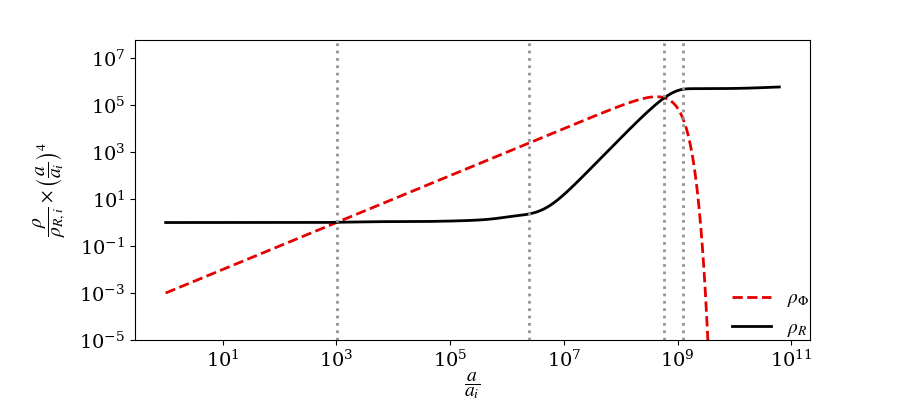

In [9]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    X=BE.a_ai
    
    Y=BE.rhoPhi/rhoR(BE.T[0])*BE.a_ai**4
    sub.plot(X,Y,linestyle='--',linewidth=2,alpha=1,c='xkcd:red',label=r'$\rho_{\Phi}$')

    Min=Y[0]
    Max=np.max(Y)
    
    Y=[rhoR(T)/rhoR(BE.T[0])*BE.a_ai[i]**4 for i,T in enumerate(BE.T)]
    sub.plot(X,Y,linestyle='-',linewidth=2,alpha=1,c='xkcd:black',label=r'$\rho_{R}$')
    
    _=Y[0]
    if Min>_:
        Min=_
    
    _=np.max(Y)
    if Max<_:
        Max=_
    
    sub.axvline(BE.aE1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.aE2,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.aD1,c='xkcd:gray',linestyle=':',linewidth=2)
    sub.axvline(BE.aD2,c='xkcd:gray',linestyle=':',linewidth=2)

    sub.set_yscale('log')
    sub.set_xscale('log')
    
    sub.set_xlabel(r'$\dfrac{a}{a_i}$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\dfrac{\rho}{\rho_{R,i}} \times \left( \dfrac{a}{a_i} \right)^4$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    sub.set_ylim(Min*1e-2,Max*1e2)

    sub.legend(bbox_to_anchor=(1, 0.0),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='lower right',fontsize=14,framealpha=0)

    fig.show()

In [10]:
#run the destructor
del BE